In [46]:
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.2
!pip install -U sentence-transformers matplotlib scikit-learn

In [47]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
# Sample text data
sentences = [
    ['cat', 'sits', 'on', 'the', 'mat'],
    ['dog', 'sits', 'on', 'the', 'rug'],
    ['fish', 'swims', 'in', 'the', 'water'],
    ['bird', 'flies', 'in', 'the', 'sky']
]

In [49]:

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=2, seed=42)

In [50]:
# Get embeddings for selected words
words = ['cat', 'sits', 'on', 'the', 'mat', 'dog', 'rug', 'fish', 'swims', 'in', 'water', 'bird', 'flies', 'sky']
word_vectors = np.array([model.wv[word] for word in words])

In [51]:
cat_vector = model.wv['cat']
print("Embedding vector for 'cat' (first 10 values):\n", cat_vector[:10])

Embedding vector for 'cat' (first 10 values):
 [ 0.00519295 -0.00197289  0.00399635  0.0079127   0.00221226  0.00343226
 -0.004907   -0.00524683 -0.00169997  0.00705562]


In [38]:
# Similarity example
similarity_cat_dog = cosine_similarity([model.wv['fish']], [model.wv['dog']])[0][0]
similarity_cat_lion = cosine_similarity([model.wv['cat']], [model.wv['sits']])[0][0]

print(f"Cosine similarity between 'fish' and 'dog': {similarity_cat_dog:.4f}")
print(f"Cosine similarity between 'cat' and 'sits': {similarity_cat_lion:.4f}")

Cosine similarity between 'cat' and 'dog': 0.0030
Cosine similarity between 'cat' and 'sits': -0.0850


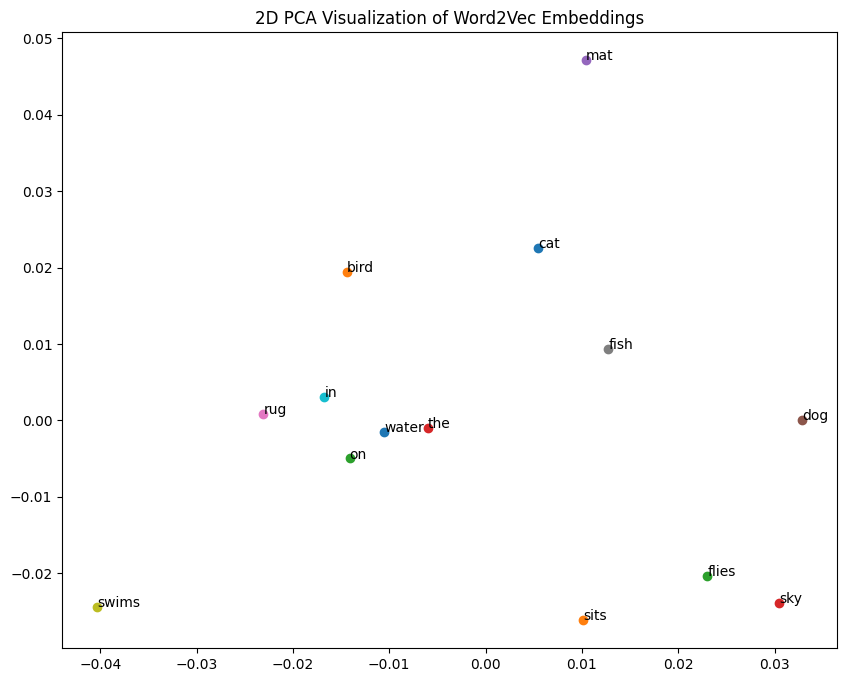

In [ ]:
# Plot embeddings using PCA
pca = PCA(n_components=2)
word_vec_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = word_vec_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y))
plt.title('2D PCA Visualization of Word2Vec Embeddings')
plt.show()
